##Data collection
Subtask:
Obtain historical cryptocurrency price data. This might involve using an API or downloading a dataset.

Reasoning: I need to obtain historical cryptocurrency price data. I will use the yfinance library to download historical Bitcoin price data, as it's a convenient way to get financial data directly into a pandas DataFrame.

In [3]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for the cryptocurrency (e.g., Bitcoin)
ticker_symbol = "BTC-USD"

# Define the date range for the historical data
start_date = "2020-01-01"
end_date = "2023-01-01"

# Download the historical data
crypto_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print("Historical Cryptocurrency Price Data (BTC-USD):")
display(crypto_data.head())

# Check if the data includes Date and Close price
if 'Close' in crypto_data.columns:
    print("\nData successfully obtained with 'Close' price.")
else:
    print("\n'Close' price column not found in the data.")

/tmp/ipython-input-2915794886.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  crypto_data = yf.download(ticker_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Historical Cryptocurrency Price Data (BTC-USD):


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095



Data successfully obtained with 'Close' price.


##Data preparation
Subtask:
Load the data into a Pandas DataFrame, handle any missing values, and ensure the data is in a suitable format for time series analysis (e.g., with a datetime index).

Reasoning: Check if the index is a DatetimeIndex and convert it if necessary, check for missing values, handle them by filling with forward fill, and display the processed DataFrame information.

In [4]:
# 1. Check if the crypto_data DataFrame has a DatetimeIndex. If not, convert it.
if not isinstance(crypto_data.index, pd.DatetimeIndex):
    crypto_data.index = pd.to_datetime(crypto_data.index)
    print("Converted index to DatetimeIndex.")
else:
    print("Index is already DatetimeIndex.")

# 2. Check for any missing values in the DataFrame.
missing_values = crypto_data.isnull().sum()
print("\nMissing values before handling:")
print(missing_values)

# 3. If missing values are found, decide on a strategy to handle them.
# Using forward fill to handle potential missing values in time series data
if missing_values.sum() > 0:
    crypto_data.fillna(method='ffill', inplace=True)
    print("\nMissing values after forward fill:")
    print(crypto_data.isnull().sum())
else:
    print("\nNo missing values found.")

# 4. Display the first few rows and the information about the processed DataFrame.
print("\nProcessed DataFrame head:")
display(crypto_data.head())

print("\nProcessed DataFrame info:")
crypto_data.info()

Index is already DatetimeIndex.

Missing values before handling:
Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

No missing values found.

Processed DataFrame head:


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095



Processed DataFrame info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2020-01-01 to 2022-12-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   1096 non-null   float64
 1   (High, BTC-USD)    1096 non-null   float64
 2   (Low, BTC-USD)     1096 non-null   float64
 3   (Open, BTC-USD)    1096 non-null   float64
 4   (Volume, BTC-USD)  1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 51.4 KB


##Feature engineering (optional but recommended)
Subtask:
Create new features from the existing data that might be useful for prediction (e.g., moving averages, technical indicators).

Reasoning: Calculate and add the 7-day and 30-day moving averages to the DataFrame, then display the last few rows to show the new columns.

In [5]:
# 1. Calculate a 7-day moving average of the 'Close' price and add it as a new column named 'MA_7'.
crypto_data['MA_7'] = crypto_data['Close'].rolling(window=7).mean()

# 2. Calculate a 30-day moving average of the 'Close' price and add it as a new column named 'MA_30'.
crypto_data['MA_30'] = crypto_data['Close'].rolling(window=30).mean()

# 3. Display the last few rows of the crypto_data DataFrame to show the newly added moving average columns.
print("DataFrame with moving averages:")
display(crypto_data.tail())

DataFrame with moving averages:


Price,Close,High,Low,Open,Volume,MA_7,MA_30
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,
2022-12-27,16717.173828,16959.845703,16642.072266,16919.291016,15748580239,16824.507254,16964.124935
2022-12-28,16552.572266,16768.169922,16497.556641,16716.400391,17005713920,16786.655413,16975.299935
2022-12-29,16642.341797,16651.755859,16508.683594,16552.322266,14472237479,16759.798270,16981.878581
2022-12-30,16602.585938,16643.427734,16408.474609,16641.330078,15929162910,16732.031529,16963.012565
2022-12-31,16547.496094,16628.986328,16517.519531,16603.673828,11239186456,16689.137277,16949.024674


##Data splitting
Subtask:
Split the time series data into training and testing sets. It's important to split chronologically for time series data.

Reasoning: Split the time series data chronologically into training and testing sets and create feature and target variables.

In [6]:
# 1. Determine the size of the training set (e.g., 80% of the data)
train_size = int(len(crypto_data) * 0.8)

# 2. Split the crypto_data DataFrame into training and testing sets chronologically
train_data = crypto_data.iloc[:train_size].copy() # Use .copy() to avoid SettingWithCopyWarning
test_data = crypto_data.iloc[train_size:].copy()   # Use .copy() to avoid SettingWithCopyWarning

# 3. Create separate variables for features (X) and target variable (y)
# Using 'Open', 'High', 'Low', 'Volume', 'MA_7', and 'MA_30' as features, and 'Close' as the target
features = ['Open', 'High', 'Low', 'Volume', 'MA_7', 'MA_30']
target = 'Close'

X_train = train_data[features].copy() # Use .copy()
y_train = train_data[target].copy()   # Use .copy()

X_test = test_data[features].copy()   # Use .copy()
y_test = test_data[target].copy()     # Use .copy()

# Handle potential NaNs created by moving averages in the training set
# Dropping rows with NaNs is one approach, or forward/backward fill depending on context
# Align y_train with X_train after dropping NaNs
X_train.dropna(inplace=True)
y_train = y_train.loc[X_train.index]

# 4. Print the shapes of the resulting training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (847, 6)
Shape of y_train: (847, 1)
Shape of X_test: (220, 6)
Shape of y_test: (220, 1)


##Model selection
Subtask:
Choose an appropriate model for time series prediction. This could be a simple model like Linear Regression or a more complex one like an ARIMA model or a recurrent neural network (RNN).

Reasoning: Choose Linear Regression as the model for time series prediction and import it from scikit-learn.

In [7]:
# Choose a suitable model for time series prediction (Linear Regression)
# Import the chosen model
from sklearn.linear_model import LinearRegression

# Instantiate the chosen model
model = LinearRegression()

##Model training
Subtask:
Train the chosen model (Linear Regression) on the training data.

Reasoning: Train the Linear Regression model using the training features and target variable.

In [8]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

##Prediction
Subtask:
Prediction

Instructions
Use the trained Linear Regression model to predict future cryptocurrency prices on the testing data (X_test).

Reasoning: Use the trained Linear Regression model to make predictions on the testing data as instructed.

In [9]:
# Use the trained model to make predictions on the testing data
y_pred = model.predict(X_test)

# Print the first few predicted values to verify
print("First 5 predicted prices:")
print(y_pred[:5])

# Print the shape of the predictions
print("\nShape of predictions:", y_pred.shape)

First 5 predicted prices:
[[28788.567364  ]
 [28567.01679024]
 [28588.60269435]
 [29169.96896494]
 [31464.12099888]]

Shape of predictions: (220, 1)


In [11]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model's performance using metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Squared Error (MSE): 95565.42
Root Mean Squared Error (RMSE): 309.14
Mean Absolute Error (MAE): 210.40


##Visualization
Subtask:
Visualize the actual and predicted cryptocurrency prices to assess the model's performance.

Reasoning: Visualize the actual and predicted cryptocurrency prices over time using a line plot to compare their trends.

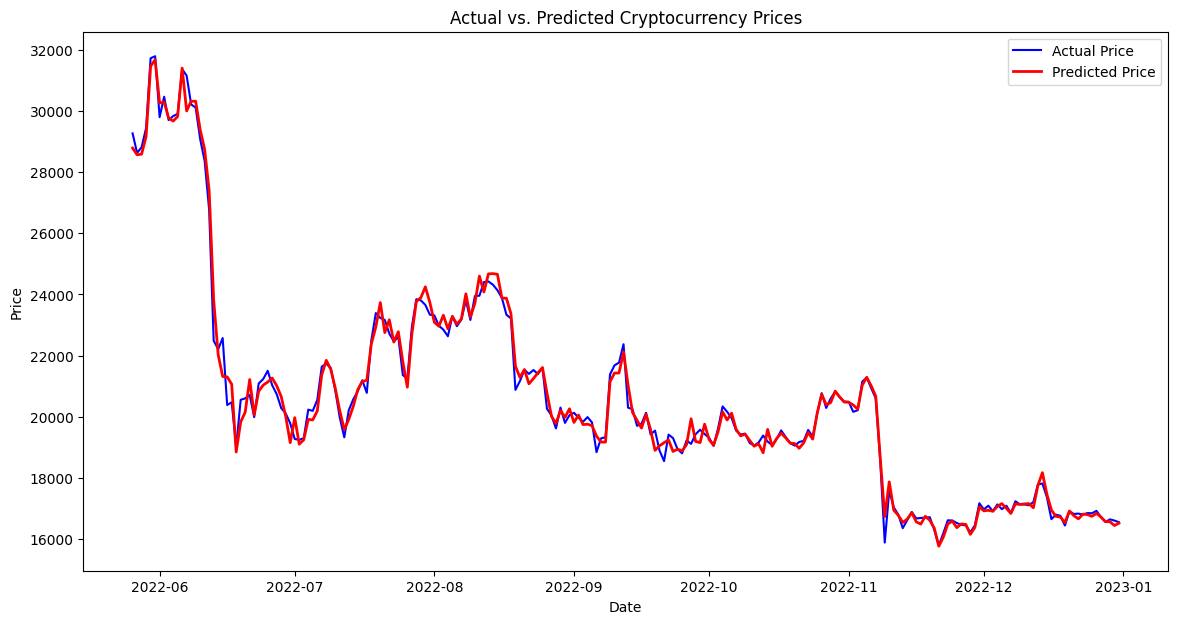

In [13]:
import matplotlib.pyplot as plt

# 1. Create a Matplotlib figure and axes
plt.figure(figsize=(14, 7))

# 2. Plot actual prices from y_test
plt.plot(y_test.index, y_test, color='blue', label='Actual Price')

# 3. Plot predicted prices from y_pred
plt.plot(y_test.index, y_pred, color='red', linewidth=2, label='Predicted Price')

# 4. Add a title
plt.title('Actual vs. Predicted Cryptocurrency Prices')

# 5. Label axes
plt.xlabel('Date')
plt.ylabel('Price')

# 6. Add a legend
plt.legend()

# 7. Display the plot
plt.show()